In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
cal = pd.read_csv('calendar.csv')
lis = pd.read_csv('listings.csv')
rev = pd.read_csv('reviews.csv')

In [3]:
cal.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [4]:
lis.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [5]:
rev.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


# Calendar EDA

In [6]:
cal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [7]:
cal.describe()

,listing_id
count,1.393570e+06
mean,5.550111e+06
std,2.962274e+06
min,3.335000e+03
25%,3.258213e+06
50%,6.118244e+06
75%,8.035212e+06
max,1.034016e+07


In [8]:
# Changes Data types of columns
cal['date'] = pd.to_datetime(cal['date'])
cal['price'] = cal['price'].str.replace('[^\d.]', '', regex=True)
cal['price'] = pd.to_numeric(cal['price'], errors='coerce')
cal['price'] = cal['price'].astype('Int64')

cal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype         
---  ------      --------------    -----         
 0   listing_id  1393570 non-null  int64         
 1   date        1393570 non-null  datetime64[ns]
 2   available   1393570 non-null  object        
 3   price       934542 non-null   Int64         
dtypes: Int64(1), datetime64[ns](1), int64(1), object(1)
memory usage: 43.9+ MB


In [9]:
total_null_value = cal.isnull().sum()
null_val_per = (total_null_value/len(cal))*100
null_val_per

listing_id     0.000000
date           0.000000
available      0.000000
price         32.938998
dtype: float64

<Axes: >

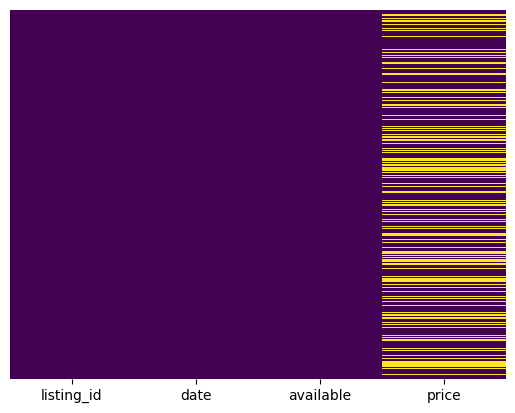

In [10]:
# Checking null values

sns.heatmap(cal.isnull(),yticklabels=False,cbar=False,cmap='viridis')

#### Price column contains a lot of null values

In [11]:
# Removing NUll values

cal = cal.dropna()

In [12]:
cal.isnull().sum()

listing_id    0
date          0
available     0
price         0
dtype: int64

<Axes: >

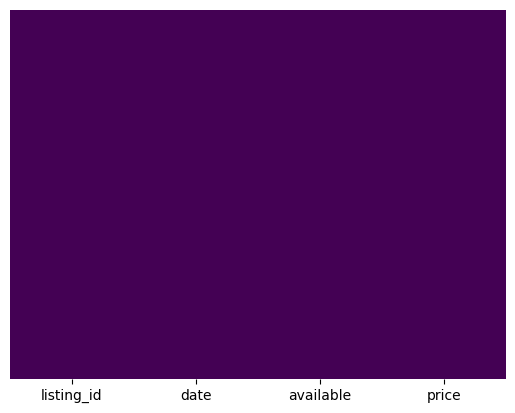

In [13]:
# Checking null values

cal.isnull().sum()
sns.heatmap(cal.isnull(),yticklabels=False,cbar=False,cmap='viridis')

###### Null values are removed.

In [14]:
cal.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,85
1,241032,2016-01-05,t,85
9,241032,2016-01-13,t,85
10,241032,2016-01-14,t,85
14,241032,2016-01-18,t,85


In [15]:
cal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 934542 entries, 0 to 1393213
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   listing_id  934542 non-null  int64         
 1   date        934542 non-null  datetime64[ns]
 2   available   934542 non-null  object        
 3   price       934542 non-null  Int64         
dtypes: Int64(1), datetime64[ns](1), int64(1), object(1)
memory usage: 36.5+ MB


In [16]:
cal['price'].nunique()

669

<Axes: xlabel='date', ylabel='Count'>

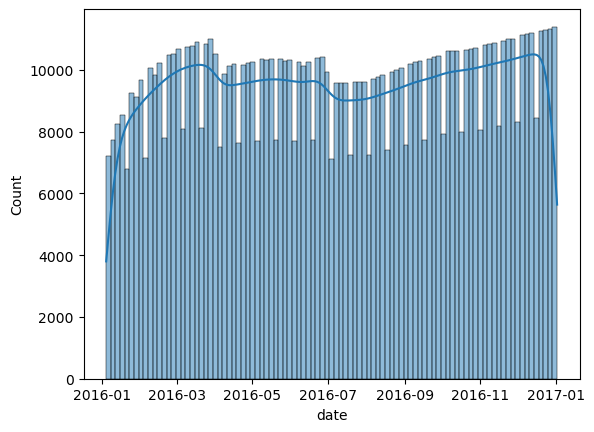

In [17]:
sns.histplot(data=cal,x='date',kde=True)

<Axes: xlabel='date', ylabel='price'>

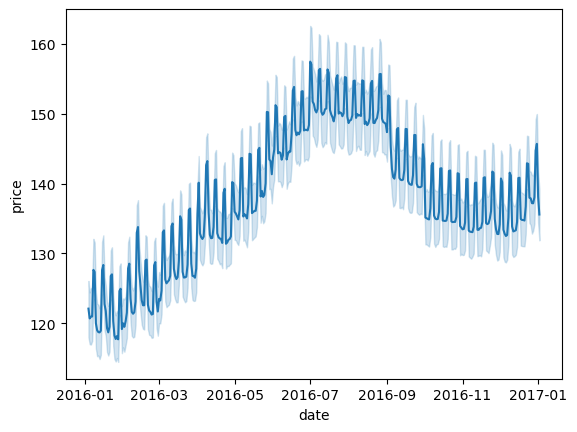

In [18]:
sns.lineplot(data=cal,x='date',y='price')

C:\Users\Zia Saab\AppData\Local\Temp\ipykernel_13880\261348273.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=cal.corr(),annot=True)


<Axes: >

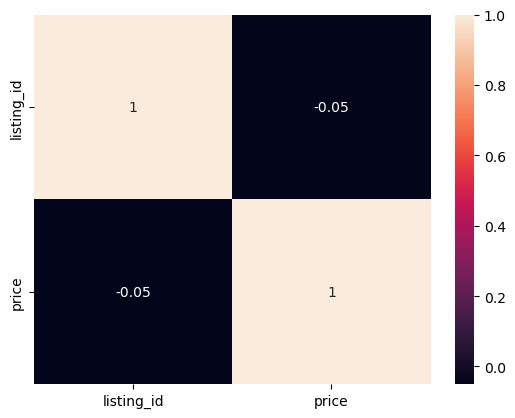

In [19]:
sns.heatmap(data=cal.corr(),annot=True)

D:\Anaconda\Lib\site-packages\seaborn\distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
D:\Anaconda\Lib\site-packages\seaborn\distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(widths, name="widths"),


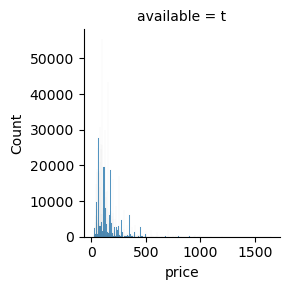

In [20]:
g = sns.FacetGrid(data=cal, col="available")
g.map(sns.histplot, "price")
plt.show()

# Reviews EDA

In [21]:
rev.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [22]:
rev['comments'].nunique()

84136

In [23]:
rev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     84849 non-null  int64 
 1   id             84849 non-null  int64 
 2   date           84849 non-null  object
 3   reviewer_id    84849 non-null  int64 
 4   reviewer_name  84849 non-null  object
 5   comments       84831 non-null  object
dtypes: int64(3), object(3)
memory usage: 3.9+ MB


In [24]:
rev.describe()

,listing_id,id,reviewer_id
count,8.484900e+04,8.484900e+04,8.484900e+04
mean,3.005067e+06,3.058765e+07,1.701301e+07
std,2.472877e+06,1.636613e+07,1.353704e+07
min,4.291000e+03,3.721000e+03,1.500000e+01
25%,7.946330e+05,1.725127e+07,5.053141e+06
50%,2.488228e+06,3.228809e+07,1.413476e+07
75%,4.694479e+06,4.457648e+07,2.762402e+07
max,1.024814e+07,5.873651e+07,5.281274e+07


In [25]:
rev.shape

(84849, 6)

In [26]:
# Changing datatype of date column

rev['date'] = pd.to_datetime(rev['date'])

In [27]:
rev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   listing_id     84849 non-null  int64         
 1   id             84849 non-null  int64         
 2   date           84849 non-null  datetime64[ns]
 3   reviewer_id    84849 non-null  int64         
 4   reviewer_name  84849 non-null  object        
 5   comments       84831 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 3.9+ MB


In [28]:
# Checking null values

rev.isnull().sum()

listing_id        0
id                0
date              0
reviewer_id       0
reviewer_name     0
comments         18
dtype: int64

<Axes: >

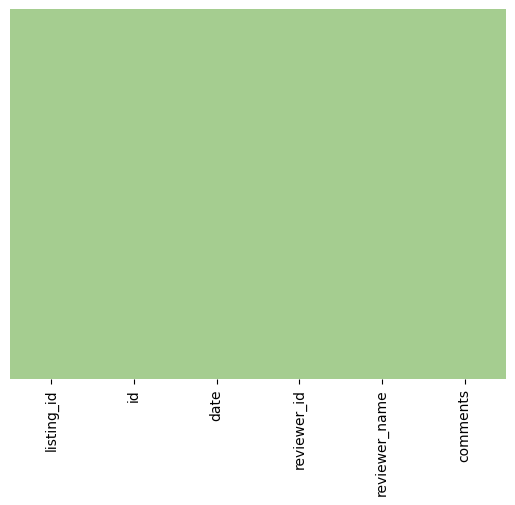

In [29]:
sns.heatmap(rev.isnull(),yticklabels=False,cbar=False,cmap='crest')

###### There's some null values in comments column but can't be shown because of very less count. We have to remove these null values.

In [30]:
rev.dropna(inplace=True)

In [31]:
rev.isnull().sum()

listing_id       0
id               0
date             0
reviewer_id      0
reviewer_name    0
comments         0
dtype: int64

###### Null values are removed

<Axes: xlabel='date', ylabel='Count'>

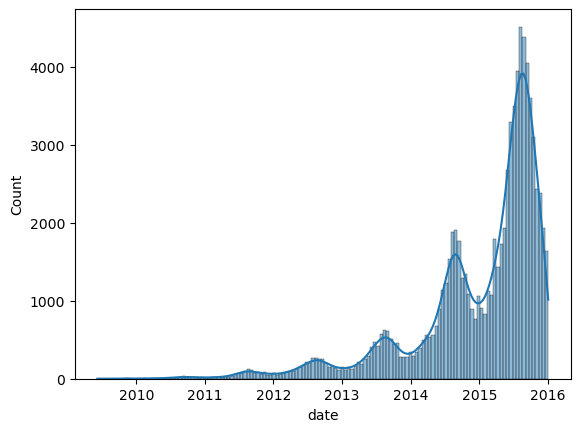

In [32]:
sns.histplot(data=rev,x='date',kde=True)

<Axes: xlabel='date', ylabel='id'>

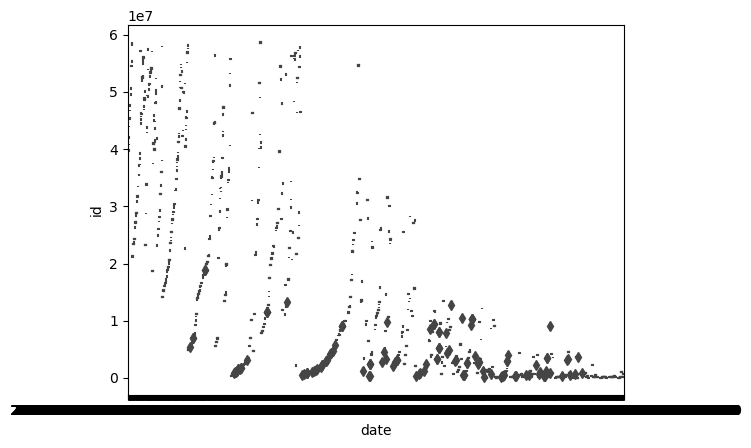

In [33]:
sns.boxplot(x="date", y="id", data=rev)

<Axes: xlabel='date', ylabel='id'>

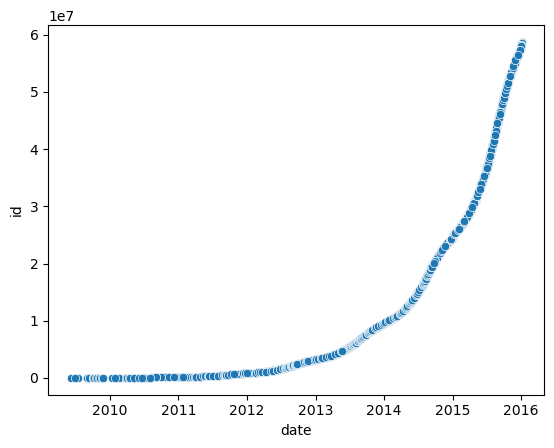

In [34]:
sns.scatterplot(x="date", y="id", data=rev)

<Axes: xlabel='date', ylabel='listing_id'>

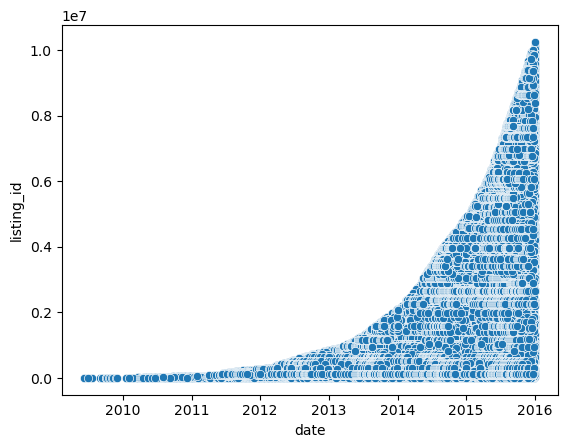

In [35]:
sns.scatterplot(x="date", y="listing_id", data=rev)

<Axes: xlabel='date', ylabel='reviewer_id'>

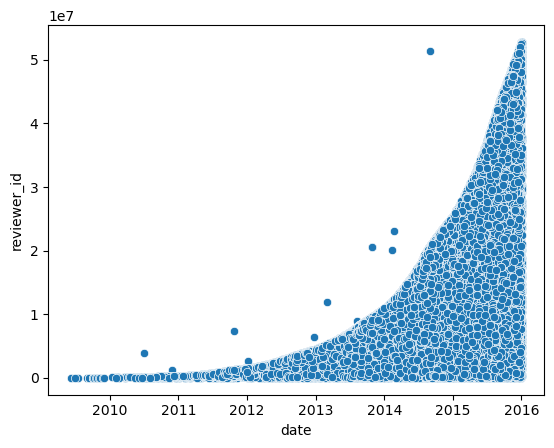

In [36]:
sns.scatterplot(x="date", y="reviewer_id", data=rev)

# Listings EDA

In [37]:
lis.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [38]:
lis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

In [39]:
lis.shape

(3818, 92)

In [40]:
lis.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,...,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,...,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,...,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,...,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,...,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,...,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,...,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


In [41]:
cat_colm = lis.select_dtypes(include='object').columns
list(cat_colm)

['listing_url',
 'last_scraped',
 'name',
 'summary',
 'space',
 'description',
 'experiences_offered',
 'neighborhood_overview',
 'notes',
 'transit',
 'thumbnail_url',
 'medium_url',
 'picture_url',
 'xl_picture_url',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'street',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'city',
 'state',
 'zipcode',
 'market',
 'smart_location',
 'country_code',
 'country',
 'is_location_exact',
 'property_type',
 'room_type',
 'bed_type',
 'amenities',
 'price',
 'weekly_price',
 'monthly_price',
 'security_deposit',
 'cleaning_fee',
 'extra_people',
 'calendar_updated',
 'has_availability',
 'calendar_last_scraped',
 'first_review',
 'last_review',
 'require

In [42]:
cat_colm = lis.select_dtypes(exclude='object').columns
list(cat_colm)

['id',
 'scrape_id',
 'host_id',
 'host_listings_count',
 'host_total_listings_count',
 'latitude',
 'longitude',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'square_feet',
 'guests_included',
 'minimum_nights',
 'maximum_nights',
 'availability_30',
 'availability_60',
 'availability_90',
 'availability_365',
 'number_of_reviews',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'license',
 'calculated_host_listings_count',
 'reviews_per_month']

In [43]:
# Removing unnecesary columns

columns_to_keep = ['last_scraped','name','host_id','host_name','host_location','neighbourhood','neighbourhood_group_cleansed','city','state','market','smart_location','country','latitude','longitude','property_type','room_type','bathrooms','bedrooms','beds','bed_type','price','weekly_price','monthly_price','security_deposit','cleaning_fee','minimum_nights','maximum_nights','availability_365','number_of_reviews','review_scores_location','calculated_host_listings_count','reviews_per_month']
lis = lis[columns_to_keep]

In [44]:
lis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   last_scraped                    3818 non-null   object 
 1   name                            3818 non-null   object 
 2   host_id                         3818 non-null   int64  
 3   host_name                       3816 non-null   object 
 4   host_location                   3810 non-null   object 
 5   neighbourhood                   3402 non-null   object 
 6   neighbourhood_group_cleansed    3818 non-null   object 
 7   city                            3818 non-null   object 
 8   state                           3818 non-null   object 
 9   market                          3818 non-null   object 
 10  smart_location                  3818 non-null   object 
 11  country                         3818 non-null   object 
 12  latitude                        38

In [45]:
lis.isnull().sum()

last_scraped                         0
name                                 0
host_id                              0
host_name                            2
host_location                        8
neighbourhood                      416
neighbourhood_group_cleansed         0
city                                 0
state                                0
market                               0
smart_location                       0
country                              0
latitude                             0
longitude                            0
property_type                        1
room_type                            0
bathrooms                           16
bedrooms                             6
beds                                 1
bed_type                             0
price                                0
weekly_price                      1809
monthly_price                     2301
security_deposit                  1952
cleaning_fee                      1030
minimum_nights           

In [46]:
lis.fillna({'host_name':'absent','host_location':'Not Specified','neighbourhood':'Not Specified','neighbourhood_group_cleansed':'Not Specified','property_type':'Other','weekly_price':'0','monthly_price':'0','security_deposit':'0','cleaning_fee':'0'}, inplace=True)


In [47]:
lis.fillna({'bathrooms':lis['bathrooms'].mean(),'bedrooms':lis['bedrooms'].mean(),'beds':lis['beds'].mean(),'reviews_per_month':0,'review_scores_location':lis['review_scores_location'].mean()},inplace=True)

In [48]:
# changing DataTypes of some columns for better Analysis.

lis['last_scraped'] = pd.to_datetime(lis['last_scraped'])

lis['price'] = lis['price'].str.replace('[^\d.]', '', regex=True)
lis['price'] = pd.to_numeric(lis['price'], errors='coerce')
lis['price'] = lis['price'].astype('Int64')

lis['weekly_price'] = lis['weekly_price'].str.replace('[^\d.]', '', regex=True)
lis['weekly_price'] = pd.to_numeric(lis['weekly_price'], errors='coerce')
lis['weekly_price'] = lis['weekly_price'].astype('Int64')

lis['monthly_price'] = lis['monthly_price'].str.replace('[^\d.]', '', regex=True)
lis['monthly_price'] = pd.to_numeric(lis['monthly_price'], errors='coerce')
lis['monthly_price'] = lis['monthly_price'].astype('Int64')

lis['security_deposit'] = lis['security_deposit'].str.replace('[^\d.]', '', regex=True)
lis['security_deposit'] = pd.to_numeric(lis['security_deposit'], errors='coerce')
lis['security_deposit'] = lis['security_deposit'].astype('Int64')

lis['cleaning_fee'] = lis['cleaning_fee'].str.replace('[^\d.]', '', regex=True)
lis['cleaning_fee'] = pd.to_numeric(lis['cleaning_fee'], errors='coerce')
lis['cleaning_fee'] = lis['cleaning_fee'].astype('Int64')


In [49]:
lis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   last_scraped                    3818 non-null   datetime64[ns]
 1   name                            3818 non-null   object        
 2   host_id                         3818 non-null   int64         
 3   host_name                       3818 non-null   object        
 4   host_location                   3818 non-null   object        
 5   neighbourhood                   3818 non-null   object        
 6   neighbourhood_group_cleansed    3818 non-null   object        
 7   city                            3818 non-null   object        
 8   state                           3818 non-null   object        
 9   market                          3818 non-null   object        
 10  smart_location                  3818 non-null   object        
 11  coun

In [50]:
# Checking finally whether we have removed all the null values or not.

lis.isnull().sum()

last_scraped                      0
name                              0
host_id                           0
host_name                         0
host_location                     0
neighbourhood                     0
neighbourhood_group_cleansed      0
city                              0
state                             0
market                            0
smart_location                    0
country                           0
latitude                          0
longitude                         0
property_type                     0
room_type                         0
bathrooms                         0
bedrooms                          0
beds                              0
bed_type                          0
price                             0
weekly_price                      0
monthly_price                     0
security_deposit                  0
cleaning_fee                      0
minimum_nights                    0
maximum_nights                    0
availability_365            

<Axes: >

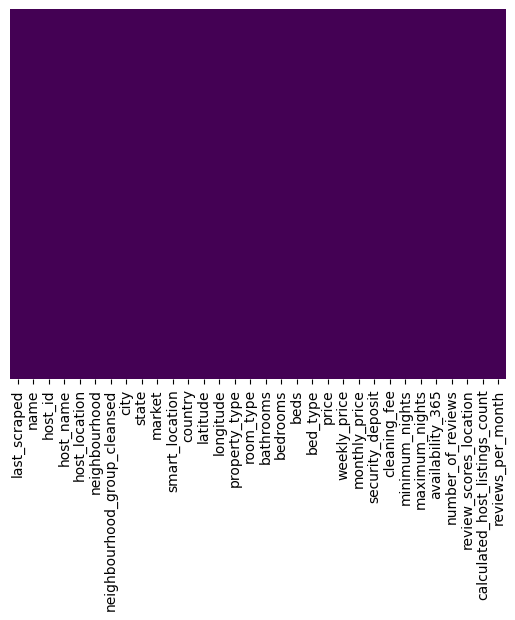

In [51]:
sns.heatmap(lis.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [52]:
lis.head()

,last_scraped,name,host_id,host_name,host_location,neighbourhood,neighbourhood_group_cleansed,city,state,market,...,monthly_price,security_deposit,cleaning_fee,minimum_nights,maximum_nights,availability_365,number_of_reviews,review_scores_location,calculated_host_listings_count,reviews_per_month
0,2016-01-04,Stylish Queen Anne Apartment,956883,Maija,"Seattle, Washington, United States",Queen Anne,Queen Anne,Seattle,WA,Seattle,...,0,0,0,1,365,346,207,9.000000,2,4.07
1,2016-01-04,Bright & Airy Queen Anne Apartment,5177328,Andrea,"Seattle, Washington, United States",Queen Anne,Queen Anne,Seattle,WA,Seattle,...,3000,100,40,2,90,291,43,10.000000,6,1.48
2,2016-01-04,New Modern House-Amazing water view,16708587,Jill,"Seattle, Washington, United States",Queen Anne,Queen Anne,Seattle,WA,Seattle,...,0,1000,300,4,30,220,20,10.000000,2,1.15
3,2016-01-04,Queen Anne Chateau,9851441,Emily,"Seattle, Washington, United States",Queen Anne,Queen Anne,Seattle,WA,Seattle,...,2300,0,0,1,1125,143,0,9.608916,1,0.00
4,2016-01-04,Charming craftsman 3 bdm house,1452570,Emily,"Seattle, Washington, United States",Queen Anne,Queen Anne,Seattle,WA,Seattle,...,0,700,125,1,1125,365,38,9.000000,1,0.89


###### There's no any null value.

In [53]:
lis.describe()

,host_id,latitude,longitude,bathrooms,bedrooms,beds,price,weekly_price,monthly_price,security_deposit,cleaning_fee,minimum_nights,maximum_nights,availability_365,number_of_reviews,review_scores_location,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.0,3818.0,3818.0,3818.0,3818.0,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000
mean,1.578556e+07,47.628961,-122.333103,1.259469,1.307712,1.735394,127.976166,414.892614,1038.352803,140.566003,45.06286,2.369303,780.447617,244.772656,22.223415,9.608916,2.946307,1.737514
std,1.458382e+07,0.043052,0.031745,0.589130,0.882700,1.139330,90.250022,551.477118,1677.470398,237.387534,49.913798,16.305902,1683.589007,126.772526,37.730892,0.572542,5.893029,1.835425
min,4.193000e+03,47.505088,-122.417219,0.000000,0.000000,1.000000,20.0,0.0,0.0,0.0,0.0,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000
25%,3.275204e+06,47.609418,-122.354320,1.000000,1.000000,1.000000,75.0,0.0,0.0,0.0,0.0,1.000000,60.000000,124.000000,2.000000,9.000000,1.000000,0.310000
50%,1.055814e+07,47.623601,-122.328874,1.000000,1.000000,1.000000,100.0,262.0,0.0,0.0,30.0,2.000000,1125.000000,308.000000,9.000000,10.000000,1.000000,1.105000
75%,2.590309e+07,47.662694,-122.310800,1.000000,2.000000,2.000000,150.0,671.5,1890.0,200.0,65.0,2.000000,1125.000000,360.000000,26.000000,10.000000,2.000000,2.660000
max,5.320861e+07,47.733358,-122.240607,8.000000,7.000000,15.000000,1000.0,6300.0,19500.0,5000.0,300.0,1000.000000,100000.000000,365.000000,474.000000,10.000000,37.000000,12.150000


C:\Users\Zia Saab\AppData\Local\Temp\ipykernel_13880\3708687180.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  subplot(2,3,1)
C:\Users\Zia Saab\AppData\Local\Temp\ipykernel_13880\3708687180.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(lis['price'])
C:\Users\Zia Saab\AppData\Local\Temp\ipykernel_13880\3708687180.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility)

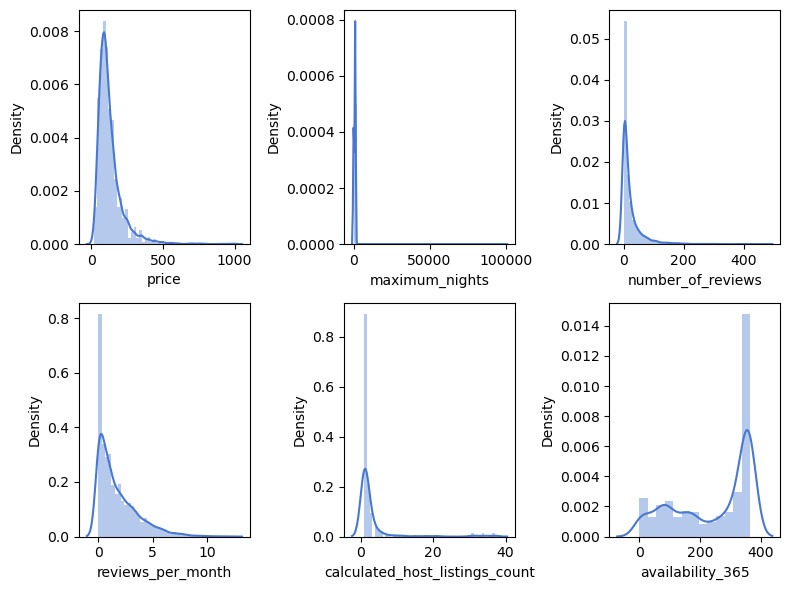

In [54]:
sns.set_palette('muted')
from pylab import *
f, ax = plt.subplots(figsize=(8,6))

subplot(2,3,1)
sns.distplot(lis['price'])

subplot(2,3,2)
sns.distplot(lis['maximum_nights'])

subplot(2,3,3)
sns.distplot(lis['number_of_reviews'])

subplot(2,3,4)
sns.distplot(lis['reviews_per_month'])

subplot(2,3,5)
sns.distplot(lis['calculated_host_listings_count'])

subplot(2,3,6)
sns.distplot(lis['availability_365'])

plt.tight_layout()
plt.draw()

C:\Users\Zia Saab\AppData\Local\Temp\ipykernel_13880\2433873566.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  subplot(2,3,1)


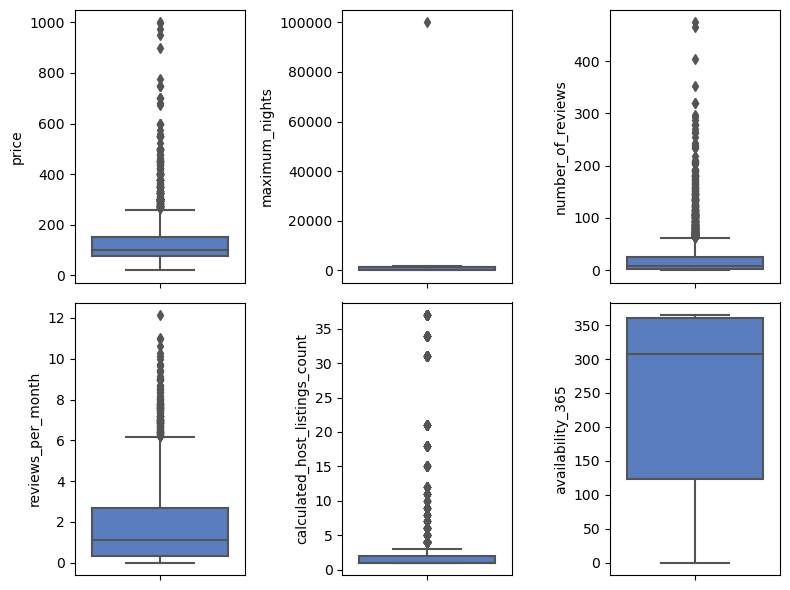

In [55]:
sns.set_palette('muted')
from pylab import *
f, ax = plt.subplots(figsize=(8,6))

subplot(2,3,1)
sns.boxplot(y = lis['price'])

subplot(2,3,2)
sns.boxplot(y = lis['maximum_nights'])

subplot(2,3,3)
sns.boxplot(y = lis['number_of_reviews'])

subplot(2,3,4)
sns.boxplot(y = lis['reviews_per_month'])

subplot(2,3,5)
sns.boxplot(y = lis['calculated_host_listings_count'])

subplot(2,3,6)
sns.boxplot(y = lis['availability_365'])

plt.tight_layout()
plt.draw()

In [56]:
lis['neighbourhood_group_cleansed'].unique()

array(['Queen Anne', 'Ballard', 'Other neighborhoods', 'Cascade',
       'Central Area', 'University District', 'Downtown', 'Magnolia',
       'West Seattle', 'Interbay', 'Beacon Hill', 'Rainier Valley',
       'Delridge', 'Seward Park', 'Northgate', 'Capitol Hill',
       'Lake City'], dtype=object)

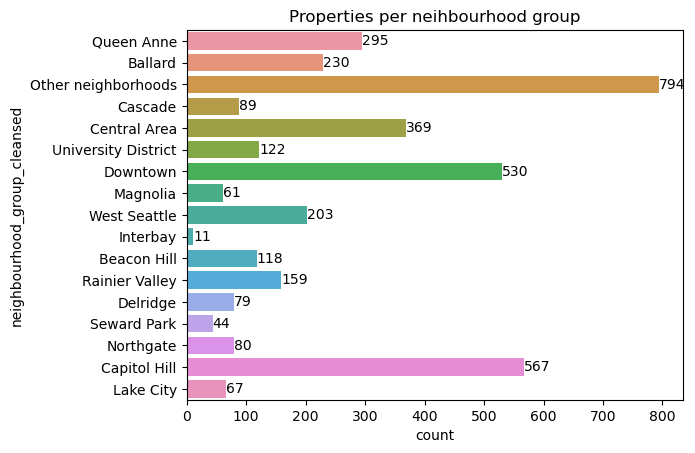

In [57]:
plt.title("Properties per neihbourhood group")
ax = sns.countplot(data=lis,y='neighbourhood_group_cleansed')
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: >

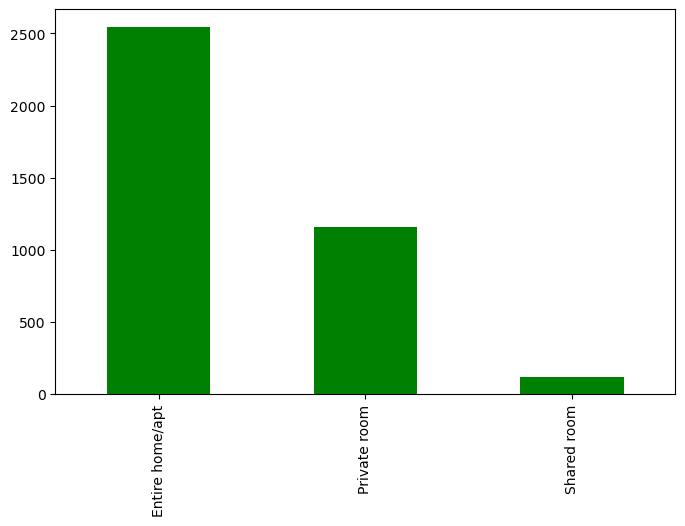

In [58]:
lis['room_type'].value_counts().plot(kind='bar',color='green',figsize=(8,5))